<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#TensorNetwork" data-toc-modified-id="TensorNetwork-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>TensorNetwork</a></span><ul class="toc-item"><li><span><a href="#Suppress-Matplotlib-Warnings" data-toc-modified-id="Suppress-Matplotlib-Warnings-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Suppress Matplotlib Warnings</a></span></li><li><span><a href="#Import-Modules" data-toc-modified-id="Import-Modules-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import Modules</a></span></li><li><span><a href="#Tensor-class-definition" data-toc-modified-id="Tensor-class-definition-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><code>Tensor</code> class definition</a></span></li><li><span><a href="#AbstractTensor-Class-Definition" data-toc-modified-id="AbstractTensor-Class-Definition-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span><code>AbstractTensor</code> Class Definition</a></span></li><li><span><a href="#TensorNetwork-class-definition" data-toc-modified-id="TensorNetwork-class-definition-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span><code>TensorNetwork</code> class definition</a></span></li></ul></li><li><span><a href="#Boundary-Edges-and-Nodes" data-toc-modified-id="Boundary-Edges-and-Nodes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Boundary Edges and Nodes</a></span><ul class="toc-item"><li><span><a href="#boundaryNodes-function-definition" data-toc-modified-id="boundaryNodes-function-definition-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><code>boundaryNodes</code> function definition</a></span></li><li><span><a href="#Sandbox" data-toc-modified-id="Sandbox-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Sandbox</a></span></li></ul></li><li><span><a href="#Sandbox" data-toc-modified-id="Sandbox-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sandbox</a></span><ul class="toc-item"><li><span><a href="#Check-if-a-condition-is-satisfied-by-all-elements-in-a-list" data-toc-modified-id="Check-if-a-condition-is-satisfied-by-all-elements-in-a-list-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Check if a condition is satisfied by all elements in a list</a></span></li><li><span><a href="#Check-if-a-variable-is-a-function" data-toc-modified-id="Check-if-a-variable-is-a-function-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Check if a variable is a function</a></span></li><li><span><a href="#Determine-number-and-type-of-arguments-a-function-takes" data-toc-modified-id="Determine-number-and-type-of-arguments-a-function-takes-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Determine number and type of arguments a function takes</a></span></li><li><span><a href="#Define-a-function-which-takes-an-arbitrary-number-of-parameters" data-toc-modified-id="Define-a-function-which-takes-an-arbitrary-number-of-parameters-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Define a function which takes an arbitrary number of parameters</a></span></li><li><span><a href="#Check-if-a-module-has-been-imported" data-toc-modified-id="Check-if-a-module-has-been-imported-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Check if a module has been imported</a></span></li><li><span><a href="#Elementwise-multiplication-(Hadamard-product)-of-arrays" data-toc-modified-id="Elementwise-multiplication-(Hadamard-product)-of-arrays-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Elementwise multiplication (Hadamard product) of arrays</a></span><ul class="toc-item"><li><span><a href="#Numpy:" data-toc-modified-id="Numpy:-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Numpy:</a></span></li><li><span><a href="#Sympy:" data-toc-modified-id="Sympy:-3.6.2"><span class="toc-item-num">3.6.2&nbsp;&nbsp;</span>Sympy:</a></span></li></ul></li><li><span><a href="#Tensors-with-sympy" data-toc-modified-id="Tensors-with-sympy-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Tensors with <code>sympy</code></a></span><ul class="toc-item"><li><span><a href="#itensor-index-notation" data-toc-modified-id="itensor-index-notation-3.7.1"><span class="toc-item-num">3.7.1&nbsp;&nbsp;</span><code>itensor</code> index notation</a></span></li><li><span><a href="#indices-and-tensors-with-sympy" data-toc-modified-id="indices-and-tensors-with-sympy-3.7.2"><span class="toc-item-num">3.7.2&nbsp;&nbsp;</span>indices and tensors with <code>sympy</code></a></span></li><li><span><a href="#sympyTensor-class-definition" data-toc-modified-id="sympyTensor-class-definition-3.7.3"><span class="toc-item-num">3.7.3&nbsp;&nbsp;</span><code>sympyTensor</code> class definition</a></span></li></ul></li></ul></li></ul></div>

# TensorNetwork

The class `TensorNetwork` will be inherited from the `networkx` base class `nx.Graph`. While the connectivity of the tensor network will be encoded by the usual `nx.Graph` class methods, `TensorNetwork` will assign various attributes to different nodes and edges in order to distinguish different kind of operators/tensors such as *isometries*, *disentanglers* and others.

Or will it be inherited from `igraph` instead? `igraph` seems like a more robust, better designed alternative to `networkx`.

## Suppress Matplotlib Warnings

In [1]:
import warnings
warnings.filterwarnings("ignore")

## Import Modules

In [2]:
import networkx as nx
import numpy as np
import matplotlib as matplotlib
import matplotlib.pyplot as plt
matplotlib.use('qt5agg')
%matplotlib inline

In [3]:
import igraph as ig

In [5]:
import sympy
from sympy import MutableSparseNDimArray, Array
from sympy import *

## `Tensor` class definition

Class `Tensor` defines an n-index object based upon `sympy.MutableSparseNDimArray`, which also contains an optional function which returns the value of the given tensor evaluated for a particular set of indices.

In [22]:
class Tensor(object):
    """
    Class Tensor defines an n-index object based upon sympy.MutableSparseNDimArray,
    which also contains an optional function which returns the value of the given
    tensor evaluated for a particular set of indices.
    
    Attributes
    ----------
    
    rank : int
        The number of indices on the tensor. For instance $t_{ijk}$ is a rank-3 tensor
        
    shape : list
        List containing the number of dimensions in each index. E.g. shape=[3,4,2],
        implies a 3 x 4 x 2 dimensional tensor. For a scalar either shape = [1] or
        shape = [] are valid.
        
        If shape = [1,1,...,1] then this also defines a scalar
        
    function : func
        Function which takes as many arguments as the rank of the tensor and returns
        some value evaluated at those indices.
    
    """
    
    fn = None
    shape = []
    rank = 0
    array = None
    
    def __init__(self, array):
        self.rank = array.rank()
        self.shape = list(array.shape())
        self.array = array
            
    def __init__(self,rank=0,shape=[1],function=None):
        if rank < 0 or type(rank) != int:
            raise ValueError("rank of the tensor must be a non-negative integer")
        if len(shape) == 0 and rank !=0:
            raise ValueError("For a non-scalar, a non-empty list of dimensions must be supplied")
        else:
            self.rank = 0
        if len(shape) == 1 and shape[0] == 1:
            self.rank = 0
            self.shape = []
        elif len(shape) >=1:
            if False not in [i > 0 and type(i) == int for i in shape]:
                self.rank = len(shape)
            else:
                raise ValueError("Elements of shape can only be positive integers")
        
        self.array = sympy.MutableSparseNDimArray.zeros(*shape)
        self.shape = self.array.shape
        
        # Check to see if function really is a function. We won't perform any other
        # checks, such as whether function takes the correct number of arguments.
        # That would involve too much effort.
        if callable(function):
            args = [1]*self.rank
            try:
                function(*args)
            except:
                raise SystemError("function " + function.__name__ + " is not valid")
            
            self.fn = function
#            self.fn.__name__ = 'function'
        else:
            self.fn = None
            
#    Not needed, since we can call Tensor.function directly.
#    No, actually is needed, since we need to ensure that indices passed are not out of array bounds 
    def evalfunc(self,*args):
        print(args,type(args))
#         No need to catch an array out of bounds exception. That is done by the sympy library anyways!
        if self.array[args] != None:
            return self.fn(*args)
        
    def contract(self, *contraction_axes):
        self.array = tensorcontraction(array, *contraction_axes)
        self.rank = self.array.rank()
        self.shape = list(self.array.shape())

In [7]:
t2 = Tensor(rank=2, dims=[3,3], function = lambda i,j: i**2 - 2*j)

In [8]:
t2.fn(1,2)

-3

In [9]:
t2.evalfunc(1,2)

(1, 2) <class 'tuple'>


-3

In [10]:
t2.rank

2

In [11]:
t2.array.tolist()

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [12]:
t2.array.tomatrix()

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

In [13]:
_12.n()

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

In [14]:
t2.shape

(3, 3)

In [20]:
t2.array[1,0]

0

In [21]:
t3 = Tensor(rank=3, dims=[3,3,3], function = lambda i,j,k: (-3**i)*j + k )

In [23]:
t3.fn(4,2,1)

-161

In [29]:
t3.fn(1,2,3)

-3

In [32]:
t3.evalfunc(1,2,2)

(1, 2, 2) <class 'tuple'>


-4

## `AbstractTensor` Class Definition

The below code is also unnecessary because the class `sympy.Array` already has the required properties.

In [54]:
class AbstractTensor():
    """Class whose objects are abstract tensors with a name and a set of indices.
    Various symmetries of the indices are kept track of, and all ordinary text labels
    can have a latex equivalent.
    """
    
    def __init__(self, name, num_upper = 0, num_lower = 0, upper_labels = [], lower_labels = []):
        if not name:
            raise ValueError("Tensor name cannot be empty")
        if type(name) != str:
            raise TypeError("name should be a string")
        self.name = name
        
        if num_upper < 0 or num_lower < 0:
            raise ValueError("Number of upper and lower indices must be greater than zero.")
        if type(num_upper) != int or type(num_lower) != int:
            raise TypeError("num_upper and num_lower should be non-negative integers")
        self.num_upper = num_upper
        self.num_lower = num_lower
        
        if type(upper_labels) != list or type(lower_labels) != list:
            raise TypeError("upper_labels and lower_labels should be of list type")
        
        

## `TensorNetwork` class definition

The following code will not work. We want to define abstract tensor class first.

In [51]:
class TensorNetwork(ig.Graph):
    """Class derived from igraph.Graph, which keeps track of vertex/edge labels and boundary nodes
    
    Attributes
    ----------
    
    boundaryNodes : list
        list of nodes which are attached to only one edge, i.e. nodes of degree 1.
        These nodes constitute the "boundary" of the graph.

    """
    
    def __init__(self, *args, **kwds):
        ig.Graph.__init__(self, *args, **kwds)
    
    boundaryNodes = []
    nodeTypes = {"input" : {"shape" : "hidden"},
                 "output" : {"shape" : "hidden"},
                 "body" : {"shape" : "hidden"} }

In [18]:
g1 = TensorNetwork()

In [19]:
g1["name"] = "t1"

In [20]:
print(g1)

IGRAPH U--- 0 0 -- t1
+ attr: name (g)


In [21]:
g1.attributes()

['name']

In [15]:
g1.__plot__?

# Boundary Edges and Nodes

`networkx` has built in algorithms to determine which nodes and edges are on the boundary of the graph. But none of them seem to work. So let's write our own code.

## `boundaryNodes` function definition

In [ ]:
def boundaryNodes(graph):
    try:
        

## Sandbox

In [22]:
ig1 = ig.Graph.Lattice([5],circular=False)

In [23]:
ig1.vs.indices

[0, 1, 2, 3, 4]

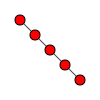

In [24]:
ig.plot(ig1,bbox=(100,100),vertex_size=10)

In [43]:
ig1.vs[0]["label"] = 'r$x_1$'

In [44]:
plot1 = ig.plot(ig1,bbox=(100,100),vertex_size=10)

In [48]:
from IPython.display import SVG, display

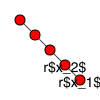

In [50]:
SVG(plot1._repr_svg_())

In [41]:
ig1.vs[1]["label"] = 'r$x_2$'

In [38]:
ig.plot?

In [49]:
g1d = nx.grid_graph([5])

In [55]:
type(g1d)

networkx.classes.graph.Graph

In [54]:
nx.tensor_product?

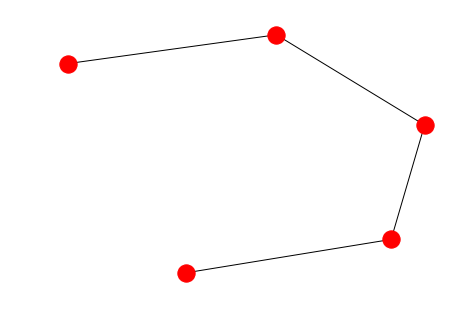

In [50]:
nx.draw(g1d)

In [51]:
g1d.nodes()

[0, 1, 2, 3, 4]

In [52]:
nx.algorithms.edge_boundary(g1d,[1,2,3])

[(1, 0), (3, 4)]

In [53]:
nx.algorithms.edge_boundary(g1d,[1,2,3],nbunch2=[0,4])

[(1, 0), (3, 4)]

In [ ]:
nx.algorithms.node_boundary(g1d,)

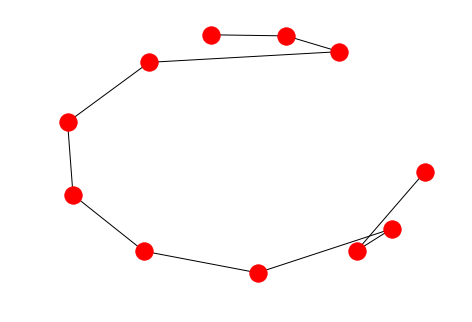

In [38]:
nx.draw(g1d)

In [40]:
nx.edges(g1d)

[(0, 1),
 (0, None),
 (1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9)]

# Sandbox

## Check if a condition is satisfied by all elements in a list

In [16]:
[x > 0 and type(x) == int for x in [2,3,4.1]]

[True, True, False]

In [17]:
def f():
    return 0

## Check if a variable is a function

In [20]:
callable(f)

True

## Determine number and type of arguments a function takes

Reference: [Stackexchange](https://stackoverflow.com/a/41188411/506434)

In [40]:
from inspect import signature

In [24]:
sig = signature(f)

In [26]:
str(sig)

'()'

In [27]:
def test(self,rank=0,dims=[1],function=None):
    return None

In [28]:
sigtest = signature(test)
str(sigtest)

'(self, rank=0, dims=[1], function=None)'

In [34]:
params = sigtest.parameters
print(params)

OrderedDict([('self', <Parameter "self">), ('rank', <Parameter "rank=0">), ('dims', <Parameter "dims=[1]">), ('function', <Parameter "function=None">)])


In [35]:
params.keys()

odict_keys(['self', 'rank', 'dims', 'function'])

In [36]:
params.values()

odict_values([<Parameter "self">, <Parameter "rank=0">, <Parameter "dims=[1]">, <Parameter "function=None">])

In [37]:
type(params['self'])

inspect.Parameter

## Define a function which takes an arbitrary number of parameters

In [60]:
def func(*args):
    for i in args:
        print(i,)

In [61]:
func(2,3,[5])

2
3
[5]


In [62]:
[1]*0

[]

In [63]:
func([])

[]


In [65]:
func.__name__

'func'

## Check if a module has been imported

In [38]:
import sys

In [44]:
'inspect' not in sys.modules

False

In [55]:
import sys

In [57]:
print(sys.modules)

{'builtins': <module 'builtins' (built-in)>, 'sys': <module 'sys' (built-in)>, '_frozen_importlib': <module 'importlib._bootstrap' (frozen)>, '_imp': <module '_imp' (built-in)>, '_warnings': <module '_warnings' (built-in)>, '_thread': <module '_thread' (built-in)>, '_weakref': <module '_weakref' (built-in)>, '_frozen_importlib_external': <module 'importlib._bootstrap_external' (frozen)>, '_io': <module 'io' (built-in)>, 'marshal': <module 'marshal' (built-in)>, 'posix': <module 'posix' (built-in)>, 'zipimport': <module 'zipimport' (built-in)>, 'encodings': <module 'encodings' from '/Users/deepak/miniconda3/lib/python3.6/encodings/__init__.py'>, 'codecs': <module 'codecs' from '/Users/deepak/miniconda3/lib/python3.6/codecs.py'>, '_codecs': <module '_codecs' (built-in)>, 'encodings.aliases': <module 'encodings.aliases' from '/Users/deepak/miniconda3/lib/python3.6/encodings/aliases.py'>, 'encodings.utf_8': <module 'encodings.utf_8' from '/Users/deepak/miniconda3/lib/python3.6/encodings/ut

In [58]:
print(sys.modules.keys())

dict_keys(['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_weakrefset', '_bootlocale', '_locale', 'site', 'os', 'errno', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'sysconfig', '_sysconfigdata_m_darwin_darwin', '_osx_support', 're', 'enum', 'types', 'functools', '_functools', 'collections', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', '_collections', 'weakref', 'collections.abc', 'sre_compile', '_sre', 'sre_parse', 'sre_constants', 'copyreg', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'mpl_toolkits', 'google', 'sphinxcontrib', 'encodings.cp437', 'runpy', 'pkgu

In [59]:
sorted?

In [63]:
print("sympy" in sys.modules)

True


## Elementwise multiplication (Hadamard product) of arrays

### Numpy:

In [139]:
a = [[1,2],[3,4]]
b = [[3,4],[5,6]]

In [140]:
np.multiply(a,b)

array([[ 3,  8],
       [15, 24]])

### Sympy: 

In [141]:
from sympy.matrices import Matrix

In [142]:
M1 = Matrix(a)
M2 = Matrix(b)

In [143]:
from sympy.matrices import matrix_multiply_elementwise

In [144]:
matrix_multiply_elementwise(M1,M2)

Matrix([
[ 3,  8],
[15, 24]])

In [149]:
np.array(M1.tolist())

array([[1, 2],
       [3, 4]], dtype=object)

In [150]:
type(_149)

numpy.ndarray

## Tensors with `sympy`

### `itensor` index notation

It would be good idea to replicate the `itensor` methodology in designing a tensor class. In `itensor` the fundamental object are of `Index` type. For e.g.:
```
auto i = Index("index i",3);
```
creates an `Index` object `i`, whose dimension is set to be 3. Having made more such `Index` objects `j`, `k`:
```
auto j = Index("index j", 4);
auto k = Index("index k", 2);
```
etc. we can construct `ITensor` objects:
```
auto A = ITensor(i);
auto B = ITensor(i,j);
auto C = ITensor(i,j,k);
```
Then `C` represents a tensor $C_{ijk}$ of dimensionality $ 3 \times 4 \times 2$.

Note that this functionality is already present in python's `sympy` module.

### indices and tensors with `sympy`

We can replicate this behavior using `sympy.symbols`.

In [10]:
i, j, k = symbols("i j k")

In [11]:
i,j, k

(i, j, k)

In [12]:
i.name

'i'

### `sympyTensor` class definition

Tensors with `sympy` would then have the syntax:
```
A = sympyTensor(i,j,k)
```
where `i`, `j`, `k` are `sympy.symbol` objects

In [ ]:
class sympyTensor()

In [7]:
symbols?

In [8]:
Function?

In [17]:
Symbol??